In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pretty_html_table import build_table
import webbrowser
import numpy as np
import mpld3

# Table

In [13]:
import csv
f = open("./table1.csv", 'r')
rdr = csv.reader(f)
#for line in rdr:
#    print(line)
parsed_csv = list(rdr)
#print(parsed_csv)

df = pd.DataFrame(parsed_csv[1:], columns=parsed_csv[0], dtype=str)

html2= build_table(df, 'blue_light')
table = html2

#print(html_table_blue_light)
#f = open('test4.html', 'w')
#f.write(html2)
#f.close()
#talbe  htmlk
#webbrowser.open('./test4.html')

# Graph

0      58.16
1      68.94
2      71.74
3     69.252
4      73.44
5     61.576
6      66.38
7      65.12
8      70.02
9      70.35
10     68.79
11     72.97
12     73.24
Name: acc@1, dtype: object
[1, 2, 3, 4, 5, 2, 3, 5, 8, 11, 10, 16, 21]
['blue', 'green', 'red', 'orange', 'darkturquoise']


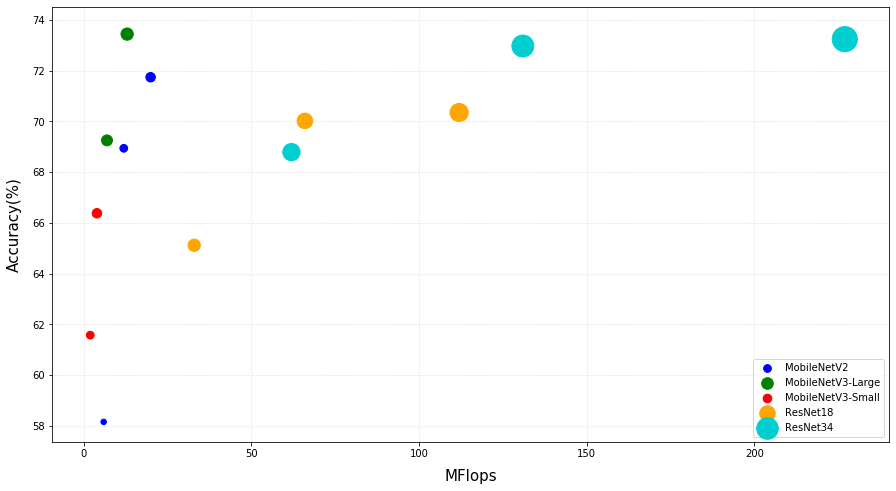

In [5]:


fig, ax = plt.subplots(figsize=(15,8))
N = 100

print(df['acc@1'])
acc = [float(i) for i in df['acc@1']]
flops = [int(i)//1000000 for i in df['flops']]
size = [int(i)//1000000 for i in df['model_size']]

print(size)

index = [0, 3, 5, 7, 10, 13]
color = ['blue', 'green', 'red', 'orange', 'darkturquoise']
label = ['MobileNetV2', 'MobileNetV3-Large', 'MobileNetV3-Small', 'ResNet18', 'ResNet34']
print(color)

ax.grid(color='lightgray', linestyle='--', alpha=0.5)
#ax.set_color_cycle([])

for i in range(len(index)-1):
    start=index[i]
    end=index[i+1]
    length=index[i+1]-index[i]
    
    scatter = ax.scatter(flops[index[i]:index[i+1]],
                         acc[index[i]:index[i+1]],
                         c=[color[i]],
                         #c=np.random.random(size=len(flops)),
                         s=np.array(size[index[i]:index[i+1]])*30,
                         #s=1000 * np.random.random(size=N),
                         cmap=plt.cm.jet,
                         label=label[i]
                        )
plt.legend()
plt.xlabel("MFlops", fontsize=15, labelpad=10)
plt.ylabel("Accuracy(%)", fontsize=15, labelpad=10)

plt.rcParams.update({'legend.labelspacing':1})
labels = ['point {0}'.format(i + 1) for i in range(N)]
#tooltip = mpld3.plugins.PointLabelTooltip(scatter, labels=labels)
#mpld3.plugins.connect(fig, tooltip)

#mpld3.display()
#mpld3.save_html(fig, 'file.html')
html1 = mpld3.fig_to_html(fig)
graph = html1

# Merged page

In [14]:
front = open('frontfile.html').read()
end = open('endfile.html').read()
middle = '</div>\n'
fullpage = front + graph + '</div>' + table + end
with open('modeldb_page.html', 'w') as f:
    f.write(fullpage)

In [15]:
webbrowser.open('./modeldb_page.html')

True